<a href="https://colab.research.google.com/github/mxnlmn/ML4.4_PW/blob/main/%D0%9A%D0%A03_%D0%A2%D0%B8%D0%BC%D0%BE%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%92_%D0%9D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [11]:
# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = to_categorical(train_labels, num_classes=10), to_categorical(test_labels, num_classes=10)


In [12]:
# Створення згорткової нейронної мережі
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [13]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Навчання моделі з використанням GPU на Google Colab
with tf.device('/device:GPU:0'):
    history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 68s 86ms/step - loss: 1.5555 - accuracy: 0.4344 - val_loss: 1.3006 - val_accuracy: 0.5369
Epoch 2/10
782/782 [==============================] - 68s 87ms/step - loss: 1.2287 - accuracy: 0.5631 - val_loss: 1.1954 - val_accuracy: 0.5635
Epoch 3/10
782/782 [==============================] - 66s 84ms/step - loss: 1.0727 - accuracy: 0.6221 - val_loss: 1.1046 - val_accuracy: 0.6068
Epoch 4/10
782/782 [==============================] - 69s 89ms/step - loss: 0.9649 - accuracy: 0.6609 - val_loss: 0.9842 - val_accuracy: 0.6615
Epoch 5/10
782/782 [==============================] - 69s 88ms/step - loss: 0.8814 - accuracy: 0.6889 - val_loss: 0.9702 - val_accuracy: 0.6661
Epoch 6/10
782/782 [==============================] - 68s 87ms/step - loss: 0.8224 - accuracy: 0.7122 - val_loss: 0.8880 - val_accuracy: 0.6937
Epoch 7/10
782/782 [==============================] - 70s 90ms/step - loss: 0.7695 - accuracy: 0.7303 - val_loss: 0.8945 - val_accuracy:

In [17]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 4s 12ms/step - loss: 2.2996 - accuracy: 0.0909
Test Accuracy: 9.09%


In [18]:
# Візуалізація результатів
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

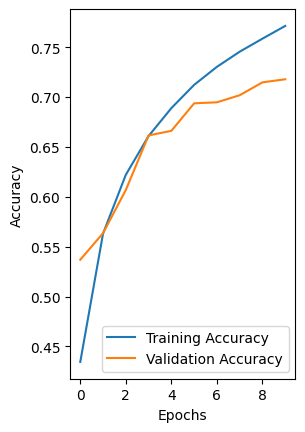

In [19]:
# Графік точності
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

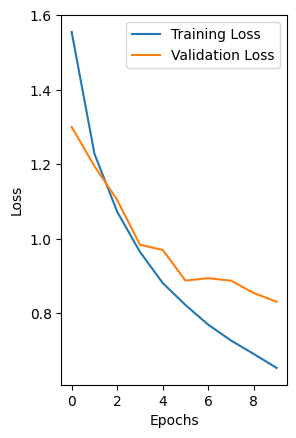

In [20]:
# Графік функції втрат
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()